## SEPARATE PORTFOLIO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../raw_data/full_data_clean.xlsx', engine='openpyxl')

In [3]:
data.head()

,Unnamed: 0,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,170734,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
1,171773,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
2,167138,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
3,180517,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
4,149033,PAGADO,COLECTIVO,Dolor Abdominal Y Pelvico,EMERGENCIA,CLINICA,Miranda,F,47,29,14,2018-09-02,40-49,Ambulatorio


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
1,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
2,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
3,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
4,PAGADO,COLECTIVO,Dolor Abdominal Y Pelvico,EMERGENCIA,CLINICA,Miranda,F,47,29,14,2018-09-02,40-49,Ambulatorio


In [6]:
data.shape

(151251, 13)

In [7]:
print('total_amount:', data["amount"].sum())

total_amount: 97905791


In [8]:
data['insurance_type'].unique()

array(['INDIVIDUAL', 'COLECTIVO'], dtype=object)

## PORTFOLIO INDIVIDUAL 

In [9]:
data_indiv = data.query('insurance_type == "INDIVIDUAL"')

In [10]:
data_indiv.shape

(39432, 13)

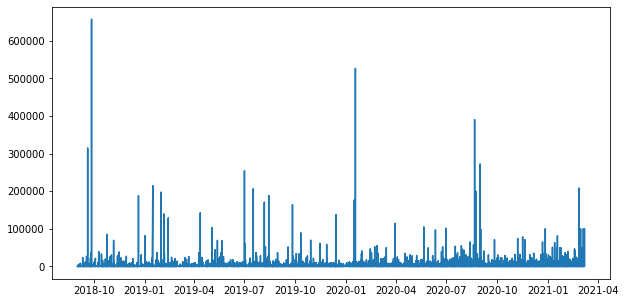

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data_indiv["date_issue"], data_indiv["amount"])

In [12]:
print('total_amount_indiv:', data_indiv["amount"].sum())
print('percentage_amount_indiv:', (data_indiv["amount"].sum() / data["amount"].sum()) * 100)

total_amount_indiv: 49113343
percentage_amount_indiv: 50.16387947879406


In [13]:
data_indiv.describe()

,age,country_id,amount
count,39432.000000,39432.000000,39432.000000
mean,42.092945,28.399244,1245.519958
std,21.765455,3.021139,7548.133962
min,0.000000,1.000000,0.000000
25%,28.000000,29.000000,39.000000
50%,43.000000,29.000000,108.000000
75%,59.000000,29.000000,507.000000
max,96.000000,46.000000,657312.000000


In [14]:
data_indiv_max = data_indiv.query('amount > 200000')

In [ ]:
data_indiv_max.head()

#### *Remove amount > 200000*

In [ ]:
data_indiv_homog = data_indiv.query('amount < 200000')

In [ ]:
data_indiv_homog.shape

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data_indiv_homog["date_issue"], data_indiv_homog["amount"])

In [ ]:
data_indiv_homog

In [ ]:
data_indiv_homog.to_excel('../raw_data/data_indiv_full.xlsx', engine='xlsxwriter')

In [ ]:
data_indiv_dayly = data_indiv_homog.groupby('date_issue', as_index = False).agg({'amount': 'sum'})
data_indiv_dayly.columns = ['date_issue','total_amount_claims']

In [ ]:
data_indiv_dayly.shape

In [ ]:
data_days_plotting = data_indiv_dayly.set_index('date_issue')
data_days_plotting.plot(grid=True, figsize=(15,5))

In [ ]:
data_indiv_weekly = data_indiv_dayly.resample('W-Mon', on='date_issue').sum().reset_index().sort_values(by='date_issue')

In [ ]:
data_indiv_weekly.shape

In [ ]:
data_indiv_weekly.to_excel('../raw_data/data_indiv_weekly.xlsx', engine='xlsxwriter')

## PORTFOLIO COLECTIVO

In [ ]:
data_colec = data.query('insurance_type == "COLECTIVO"')

In [ ]:
data_colec.shape

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data_colec["date_issue"], data_colec["amount"])

In [ ]:
print('total_amount_colect:', data_colec["amount"].sum())
print('percentage_amount_colect:', (data_colec["amount"].sum() / data["amount"].sum()) * 100)

In [ ]:
data_colec.describe()

In [ ]:
data_colec_max = data_colec.query('amount > 60000')

In [ ]:
data_colec_max

#### *Remove amount > 60000*

In [ ]:
data_colec_homog = data_colec.query('amount < 60000')

In [ ]:
data_colec_homog.shape

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data_colec_homog["date_issue"], data_colec_homog["amount"])

In [ ]:
data_colec_homog

In [ ]:
data_colec_homog.to_excel('../raw_data/data_colec_full.xlsx', engine='xlsxwriter')

In [ ]:
data_colec_dayly = data_colec_homog.groupby('date_issue', as_index = False).agg({'amount': 'sum'})
data_colec_dayly.columns = ['date_issue','total_amount_claims']

In [ ]:
data_colec_dayly.shape

In [ ]:
data_days_plotting_colec = data_colec_dayly.set_index('date_issue')
data_days_plotting_colec.plot(grid=True, figsize=(15,5))

In [ ]:
data_colec_weekly = data_colec_dayly.resample('W-Mon', on='date_issue').sum().reset_index().sort_values(by='date_issue')

In [ ]:
data_colec_weekly.shape

In [ ]:
data_colec_weekly.to_excel('../raw_data/data_colec_weekly.xlsx', engine='xlsxwriter')